In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
q = QuantumRegister('q', 4)
tmp = QuantumRegister('tmp', 1)
res = ClassicalRegister('res', 4)

In [19]:
s = 3 # 0011
oracle = QuantumCircuit(q, tmp, res)
for i in range(len(q)):
    if (s & (1 << i)):
        oracle.cx(q[i], tmp[0])

In [20]:
print(oracle.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
qreg tmp[1];
creg res[4];
cx q[0],tmp[0];
cx q[1],tmp[0];



In [21]:
bv = QuantumCircuit(q, tmp, res)
bv.x(tmp[0])
bv.h(q)
bv.h(tmp)
bv += oracle
bv.h(q)
bv.h(tmp)
bv.measure(q, res)

In [22]:
print(bv.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
qreg tmp[1];
creg res[4];
x tmp[0];
h q[0];
h q[1];
h q[2];
h q[3];
h tmp[0];
cx q[0],tmp[0];
cx q[1],tmp[0];
h q[0];
h q[1];
h q[2];
h q[3];
h tmp[0];
measure q[0] -> res[0];
measure q[1] -> res[1];
measure q[2] -> res[2];
measure q[3] -> res[3];



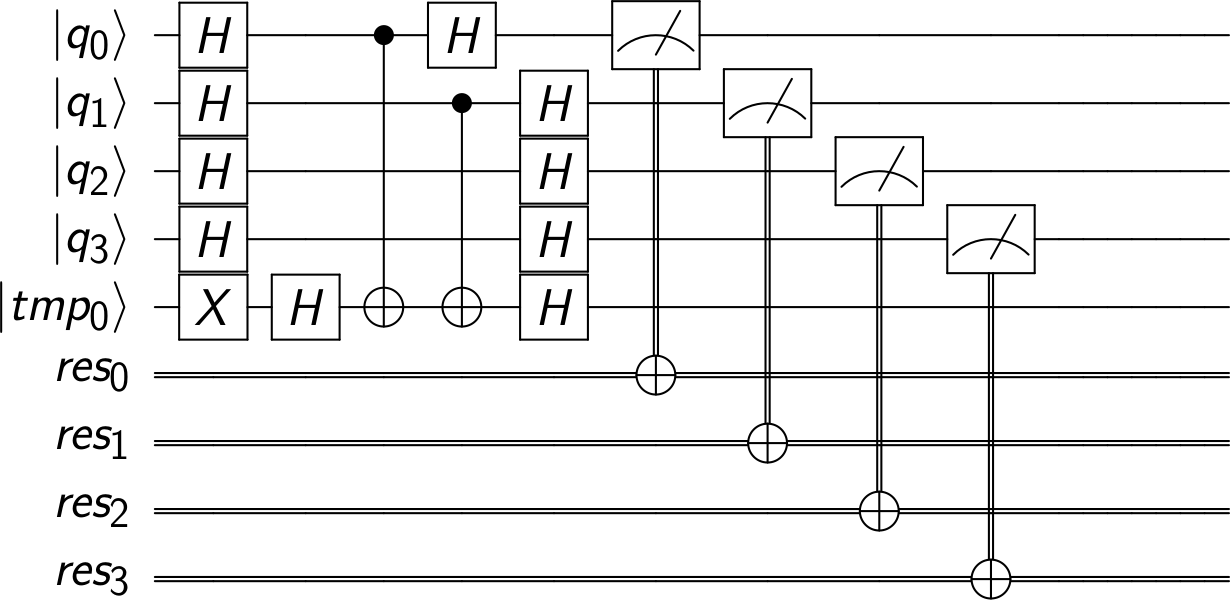

In [23]:
from qiskit.tools.visualization import circuit_drawer
circuit_drawer(bv)

In [24]:
from qiskit import QuantumProgram
qp = QuantumProgram()
qp.add_circuit('bv', bv)

In [25]:
import Qconfig
qp.set_api(Qconfig.APItoken, Qconfig.config['url'])

In [26]:
from qiskit import backends

In [27]:
print(backends.local_backends())
print(backends.remote_backends())

['local_projectq_simulator', 'local_qasm_simulator', 'local_clifford_simulator', 'local_qiskit_simulator', 'local_unitary_simulator']
['ibmqx2', 'ibmqx5', 'ibmqx4', 'ibmqx_hpc_qasm_simulator', 'ibmqx_qasm_simulator']


In [30]:
result = qp.execute(['bv'], backend='ibmqx2', timeout=300)

{'10000': 36, '10001': 19, '10010': 16, '10011': 32, '11000': 3, '11010': 1, '11011': 1, '00000': 135, '00001': 107, '00010': 102, '00011': 562, '01000': 5, '01001': 1, '01010': 1, '01011': 3}


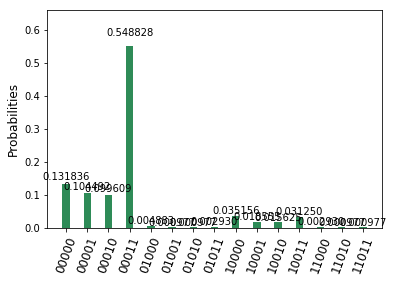

In [31]:
from qiskit.tools.visualization import plot_histogram
counts = result.get_counts('bv')
print(counts)
plot_histogram(counts)